# Honors Assignment Week 1

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("mtcars.csv")

In [3]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2
5,Valiant,18.10,6,225.00,105,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.30,8,360.00,245,3.21,3.57,15.84,0,0,3,4
7,Merc 240D,24.40,4,146.70,62,3.69,3.19,20.00,1,0,4,2
8,Merc 230,22.80,4,140.80,95,3.92,3.15,22.90,1,0,4,2
9,Merc 280,19.20,6,167.60,123,3.92,3.44,18.30,1,0,4,4


**==========================================================================================================**

## Data Quick Glance

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
df.dtypes.value_counts()

int64      6
float64    5
object     1
dtype: int64

In [7]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,20.09,6.19,230.72,146.69,3.60,3.22,17.85,0.44,0.41,3.69,2.81
std,6.03,1.79,123.94,68.56,0.53,0.98,1.79,0.50,0.50,0.74,1.62
min,10.40,4.00,71.10,52.00,2.76,1.51,14.50,0.00,0.00,3.00,1.00
25%,15.43,4.00,120.83,96.50,3.08,2.58,16.89,0.00,0.00,3.00,2.00
50%,19.20,6.00,196.30,123.00,3.70,3.33,17.71,0.00,0.00,4.00,2.00
75%,22.80,8.00,326.00,180.00,3.92,3.61,18.90,1.00,1.00,4.00,4.00
max,33.90,8.00,472.00,335.00,4.93,5.42,22.90,1.00,1.00,5.00,8.00


**==========================================================================================================**

## Histogram

In [8]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

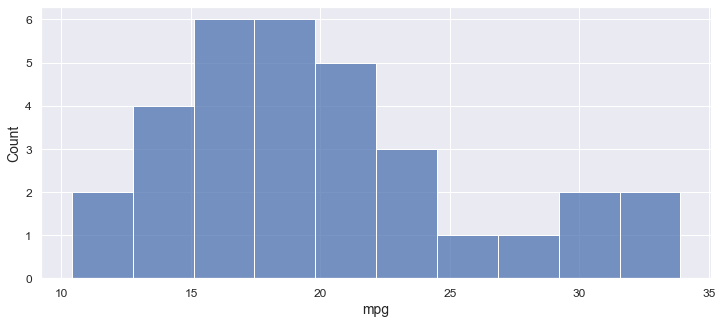

In [9]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.mpg, data=df, bins=10)

plt.show()

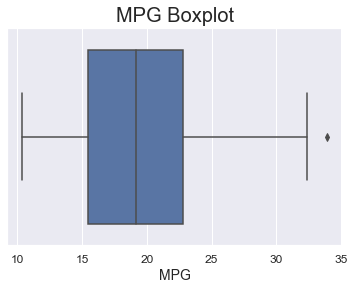

In [10]:
sns.boxplot(x="mpg", data=df)
plt.title('MPG Boxplot', size=20)

plt.xlabel("MPG")
plt.ylabel("")
plt.show()

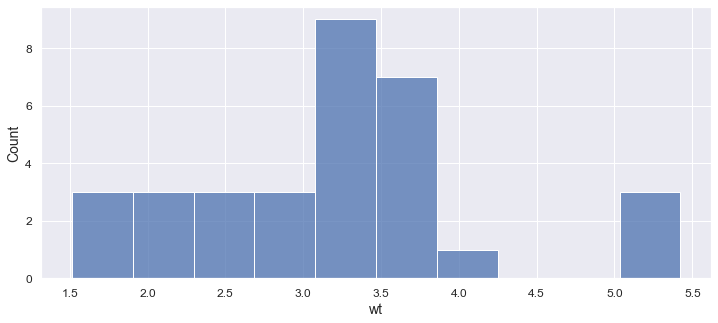

In [11]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.wt, data=df, bins=10)

plt.show()

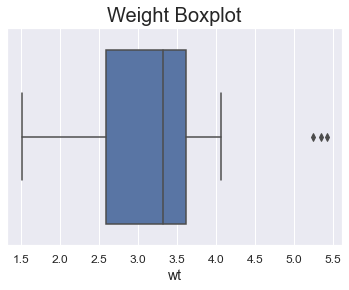

In [12]:
sns.boxplot(x="wt", data=df)
plt.title('Weight Boxplot', size=20)

plt.xlabel("wt")
plt.ylabel("")
plt.show()

**==========================================================================================================**

#### Both Mpg and Weight charts are not normally distributed, one to three outliers were found.